In [15]:
import pandas as pd
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for plotting



Matplotlib is building the font cache; this may take a moment.


In [17]:
df = pd.read_csv("../Data/cleaned_car_data.csv")
df.head(5
        )

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,1,21.14,1498.0,103.52,5,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,2,17.70,1497.0,78.00,5,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5,18


Text(0.5, 1.0, 'Distribution of Selling Price')

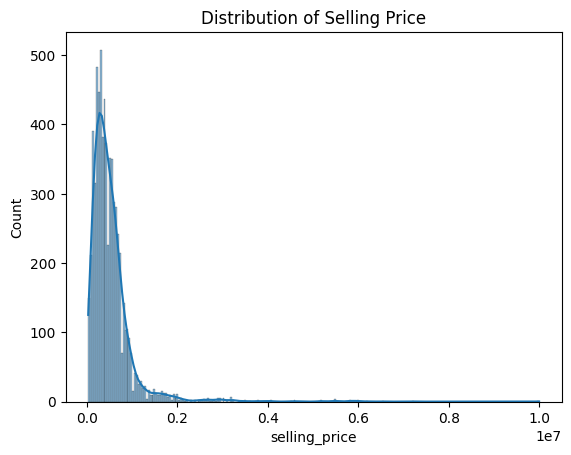

In [18]:
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')


<Axes: >

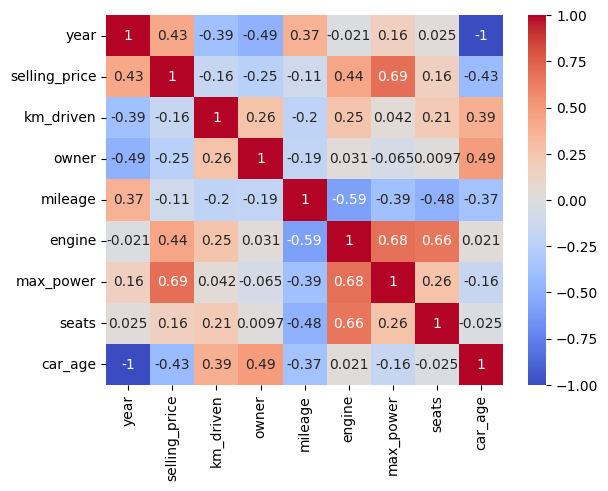

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


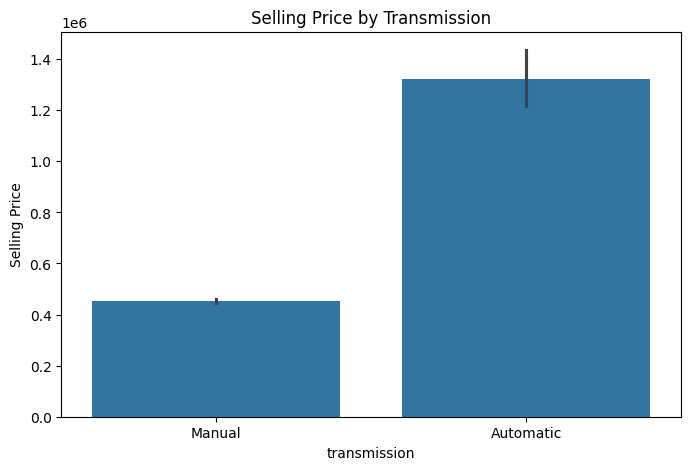

In [23]:
# selling price vs transmission type
plt.figure(figsize=(8, 5))
sns.barplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price by Transmission')
plt.ylabel('Selling Price')
plt.show() 

<Axes: xlabel='car_age', ylabel='selling_price'>

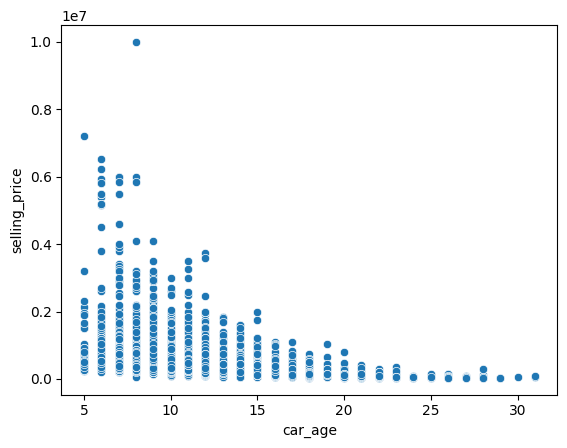

In [35]:
sns.scatterplot(x='car_age', y='selling_price', data=df)

#The observation was that, the older the car, the lesser the price to a point where it almost reaches salvage value
#also once the car gets > 15 years, it almost never sells for a high price, making prediction on this part more predictable


In [ ]:
import numpy as np
df['log_price'] = np.log1p(df['selling_price'])

#we convert it into log, to lessen the skewing and also the price distribution becomes more normal which is suitable for ML models


In [38]:
df['log_price']

0       13.017005
1       12.821261
2       11.970357
3       12.323860
4       11.775297
          ...    
6698    12.468441
6699    13.071072
6700    12.676079
6701    11.813037
6702    12.853179
Name: log_price, Length: 6703, dtype: float64

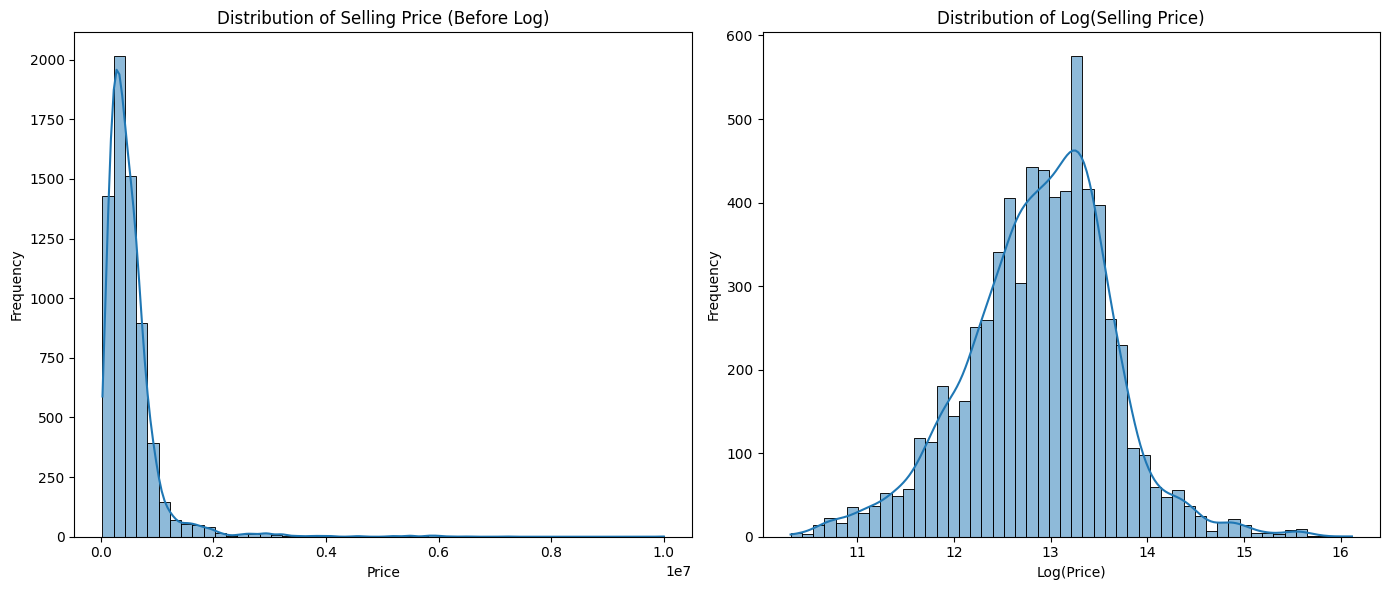

In [42]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Price (Before Log)')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['selling_price']), bins=50, kde=True)
plt.title('Distribution of Log(Selling Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Milage (Before Log)')

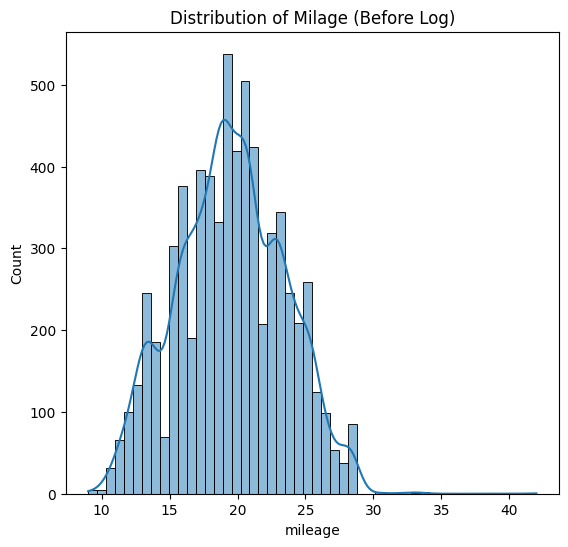

In [ ]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['mileage'], bins=50, kde=True)
plt.title('Distribution of Milage (Before Log)')

#already in a proper distrubted format, so dont need any type of log trasnformation here


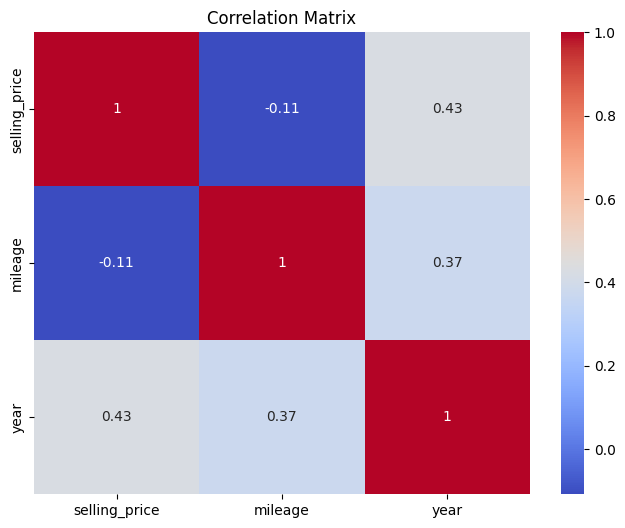

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['selling_price', 'mileage', 'year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#studying this we get
#selling_price and year have a moderate correlation (Newer cars tend to sell for higher prices)
#mileage and selling price have a slightly negative correlation 